In [115]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

In [63]:
df=pd.read_csv('titanic_data.csv') #Load data

In [64]:
#Data exploration
df['Age'].fillna(df['Age'].median(),inplace=True) #Fill na ages

In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5,1,'Countplot of Sex vs. Survived')

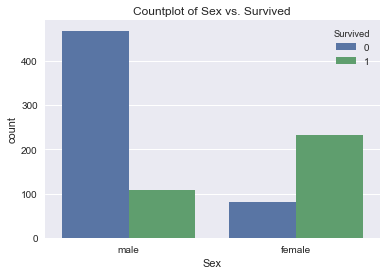

In [5]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title ("Countplot of Sex vs. Survival")

Text(0.5,1,'Histogram of Age vs. Survival')

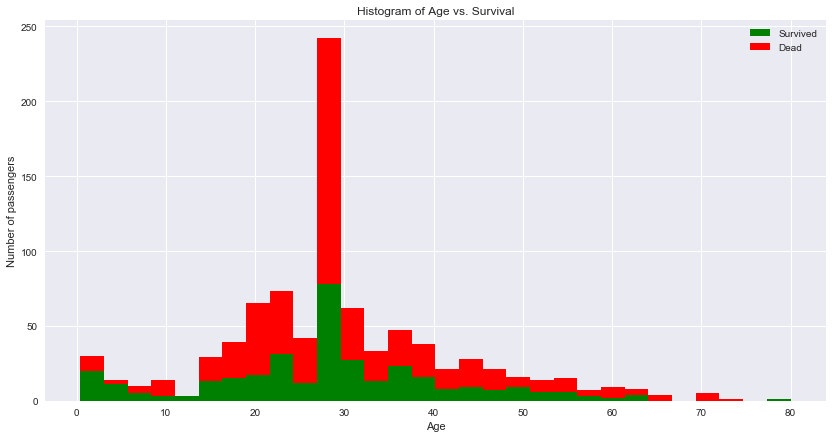

In [8]:
plt.figure(figsize=(14,7))
plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']],stacked=True, color=['g','r'],bins=30,label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.title("Histogram of Age vs. Survival")

Text(0.5,1,'Histogram of Fare vs. Survival')

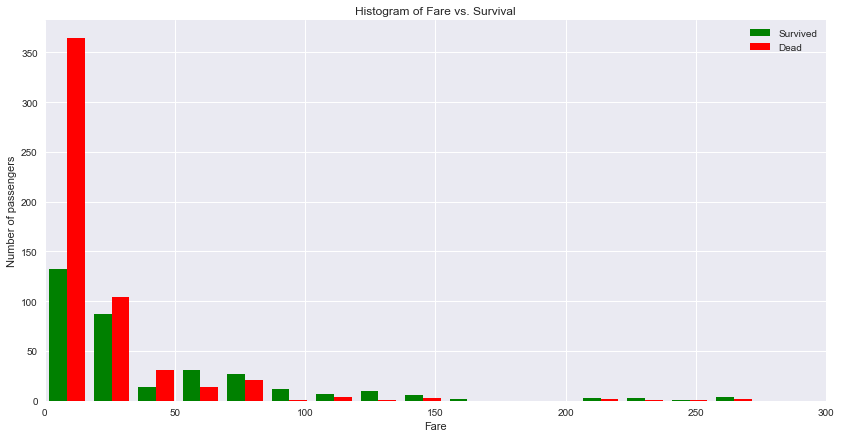

In [15]:
figure = plt.figure(figsize=(14,7))
plt.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']], color = ['g','r'],bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.xlim([0,300])
plt.legend()
plt.title("Histogram of Fare vs. Survival")

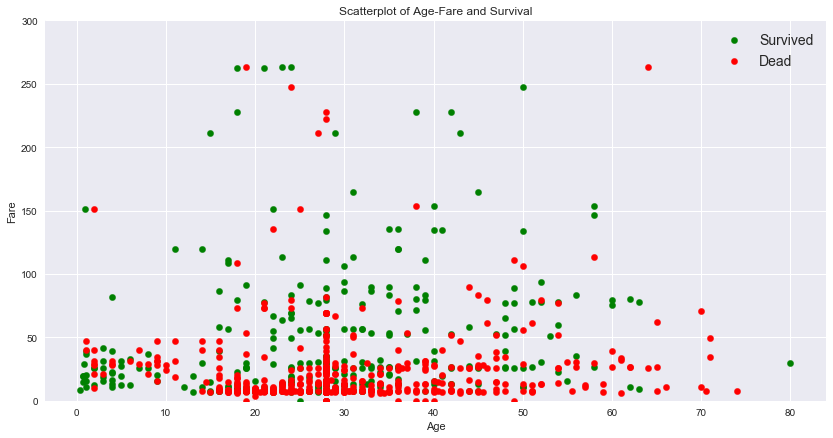

In [17]:
plt.figure(figsize=(14,7))
ax=plt.subplot()
ax.scatter(df[df['Survived']==1]['Age'],df[df['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(df[df['Survived']==0]['Age'],df[df['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_ylim([0,300])
ax.set_title('Scatterplot of Age-Fare and Survival')
ax.legend(('Survived','Dead'),scatterpoints=1,loc='upper right',fontsize=14)

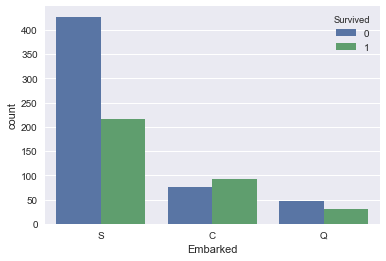

In [18]:
sns.countplot(x='Embarked',hue='Survived',data=df)

In [66]:
#Feature engineering and data cleaning
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']

# Mapping fare
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3

# Mapping age
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

#Family size
df['FamilySize']=df['Parch']+df['SibSp']+1

#Alone or not
df['Alone']=0
df.loc[df['FamilySize'] == 1, 'Alone'] = 1

#Categorizing embarked
df['Embarked'].fillna('S',inplace=True)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#Dropping elements
df.drop(drop_elements,inplace=True,axis=1)


In [67]:
le = preprocessing.LabelEncoder() #Label encoding data for modeling
for column_name in df.columns:
        if df[column_name].dtype == object:
            df[column_name] = le.fit_transform(df[column_name])
        else:
            pass
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone
0,0,3,1,1.0,0.0,0,2,0
1,1,1,0,2.0,3.0,1,2,0
2,1,3,0,1.0,1.0,0,1,1
3,1,1,0,2.0,3.0,0,2,0
4,0,3,1,2.0,1.0,0,1,1


In [99]:
#Training
x=df.iloc[:, 1:] #Data set features(without 'Survived')
y=df.iloc[:, 0] #Data set label ('Survived')
print (x.head())
print (y.head())

   Pclass  Sex  Age  Fare  Embarked  FamilySize  Alone
0       3    1  1.0   0.0         0           2      0
1       1    0  2.0   3.0         1           2      0
2       3    0  1.0   1.0         0           1      1
3       1    0  2.0   3.0         0           2      0
4       3    1  2.0   1.0         0           1      1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2) #Stratified test and train split

In [101]:
#Cross validation function to find mean accuracy of given model
def compute_score(clf,x,y,scoring='accuracy'):
    xval=cross_val_score(clf,x,y,cv=10,scoring=scoring)
    return np.mean(xval)

In [102]:
#Classifiers to try
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

In [103]:
#Setting log for classfier:accuracy
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
acc_dict = {}

In [104]:
#Iterate for classifiers and compute accuracies
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    acc = compute_score(clf,x_train,y_train,scoring='accuracy')
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

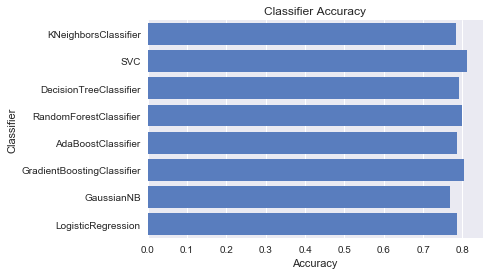

In [107]:
#Save to dataframe and plot model:accuracies
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [111]:
#Choosing SVC classfier (highest accuracy) to predict on test data
chosen_classifier= SVC()
chosen_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
#Accuracy of model
test_predictions = chosen_classifier.predict(x_test)
acc = accuracy_score(y_test, test_predictions)
print ("Accuracy: ", acc)
print ("ROC AUC Score: ", roc_auc_score(y_test, test_predictions))

Accuracy:  0.8379888268156425
ROC AUC Score:  0.8330698287220025
